# **<font color="Blue"> MOVIE RATING PREDICTION WITH PYTHON(Task-2) </font>**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-india-movies/IMDb Movies India.csv


 # **<font color="Red">Importing Libraries</font>**

In [3]:
pip install "numpy>=1.16.5,<1.23.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 52.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
chex 0.1.81 requires numpy>=1.25.0, but you have numpy 1.22.4 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.22.4 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.1 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.1 which is incompatible.
Note: you may need to res

In [4]:
import pandas as pd    #Pandas is a Python library used for working with data sets.It has functions for analyzing, cleaning, exploring, and manipulating data.
import numpy as np     #Numpy Python library is used for including any type of mathematical operation in the code. It is the fundamental package for scientific calculation in Python. 
from sklearn.model_selection import train_test_split    #train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually. By default, Sklearn train_test_split will make random partitions for the two subsets.
from sklearn.impute import SimpleImputer  #SimpleImputer it replace the missing values by the strategy means mean or mode mean for numerical columns and mode for categorical columns
from sklearn.preprocessing import StandardScaler #StandardScaler is used for scalling the data and make the data unitless also minimizing the values
from sklearn.preprocessing import OneHotEncoder  
import matplotlib.pyplot as plt #matplotlib, which is a Python 2D plotting library, and with this library, we need to import a sub-library pyplot. This library is used to plot any type of charts in Python for the code
import plotly.express as px
import seaborn as sns
from ml_fun import *
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression#, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor#, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#from sklearn.neural_network import MLPRegressor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **<font color="76109A">Data Understanding</font>**

In [5]:
df=pd.read_csv("/kaggle/input/imdb-india-movies/IMDb Movies India.csv", encoding='latin-1')

In [6]:
DataUnderstanding(df)

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  Parameters:DataFrame
  This function returns the first 5 rows, shape and datatype of each column

In [7]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Null_Unique_vals(df)

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  Parametrs:DataFRame,Colm is the columns to check for null values 
  this fucntion will checks th

,Column,Null Values,Unique Values
0,Name,0,13838
1,Year,528,102
2,Duration,8269,182
3,Genre,1877,485
4,Rating,7590,84
5,Votes,7589,2034
6,Director,525,5938
7,Actor 1,1617,4718
8,Actor 2,2384,4891
9,Actor 3,3144,4820


In [9]:
Unique_Vals(df,Colm=df.columns)

Number of unique values in Name is  13838 

Anjaam                7
Mamta                 7
Zindagi               6
Musafir               6
Albela                5
                     ..
Hamen Bhi Jeene Do    1
Hamen Khelne Do       1
Hameshaa              1
Hamid                 1
Zulm-O-Sitam          1
Name: Name, Length: 13838, dtype: int64
****************************************************************************************************
****************************************************************************************************
Number of unique values in Year is  102 

(2019)    410
(2021)    392
(2018)    381
(2017)    360
(2005)    346
         ... 
(1917)      1
(1913)      1
(1926)      1
(1914)      1
(1924)      1
Name: Year, Length: 102, dtype: int64
****************************************************************************************************
****************************************************************************************************
Number of uniq

In [10]:
duplicated_rows = df[df.duplicated()]


In [11]:
duplicated_rows

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1250,Arab Ka Sona - Abu Kaalia,(1979),NaN,Action,NaN,NaN,Master Bhagwan,Meena Rai,Dara Singh,NaN
1769,Balidan,(1992),NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN
4723,First Time - Pehli Baar,(2009),NaN,NaN,NaN,NaN,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar
9713,Musafir,NaN,NaN,Thriller,NaN,NaN,Shiva Dagar,NaN,NaN,NaN
13069,Shivani,(2019),NaN,Crime,NaN,NaN,Ugresh Prasad Ujala,Santosh,NaN,NaN
13308,Slumdog Karodpati,(2019),118 min,Thriller,NaN,NaN,Rajesh Patole,Udhav Garje,Rahul Gavane,Govindrao


In [12]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# **<font color="01EC1D">EDA and Data Preprocessing</font>**

In [13]:
df["Name"]=df["Name"].str.replace('#', '')
df["Duration"]=df["Duration"].str.replace("min",'')
df["Year"]=df["Year"].str.replace('(', '', regex=False)
df["Year"]=df["Year"].str.replace(')', '', regex=False)
df["Votes"]=df["Votes"].str.replace(',','')

In [14]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Homecoming,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

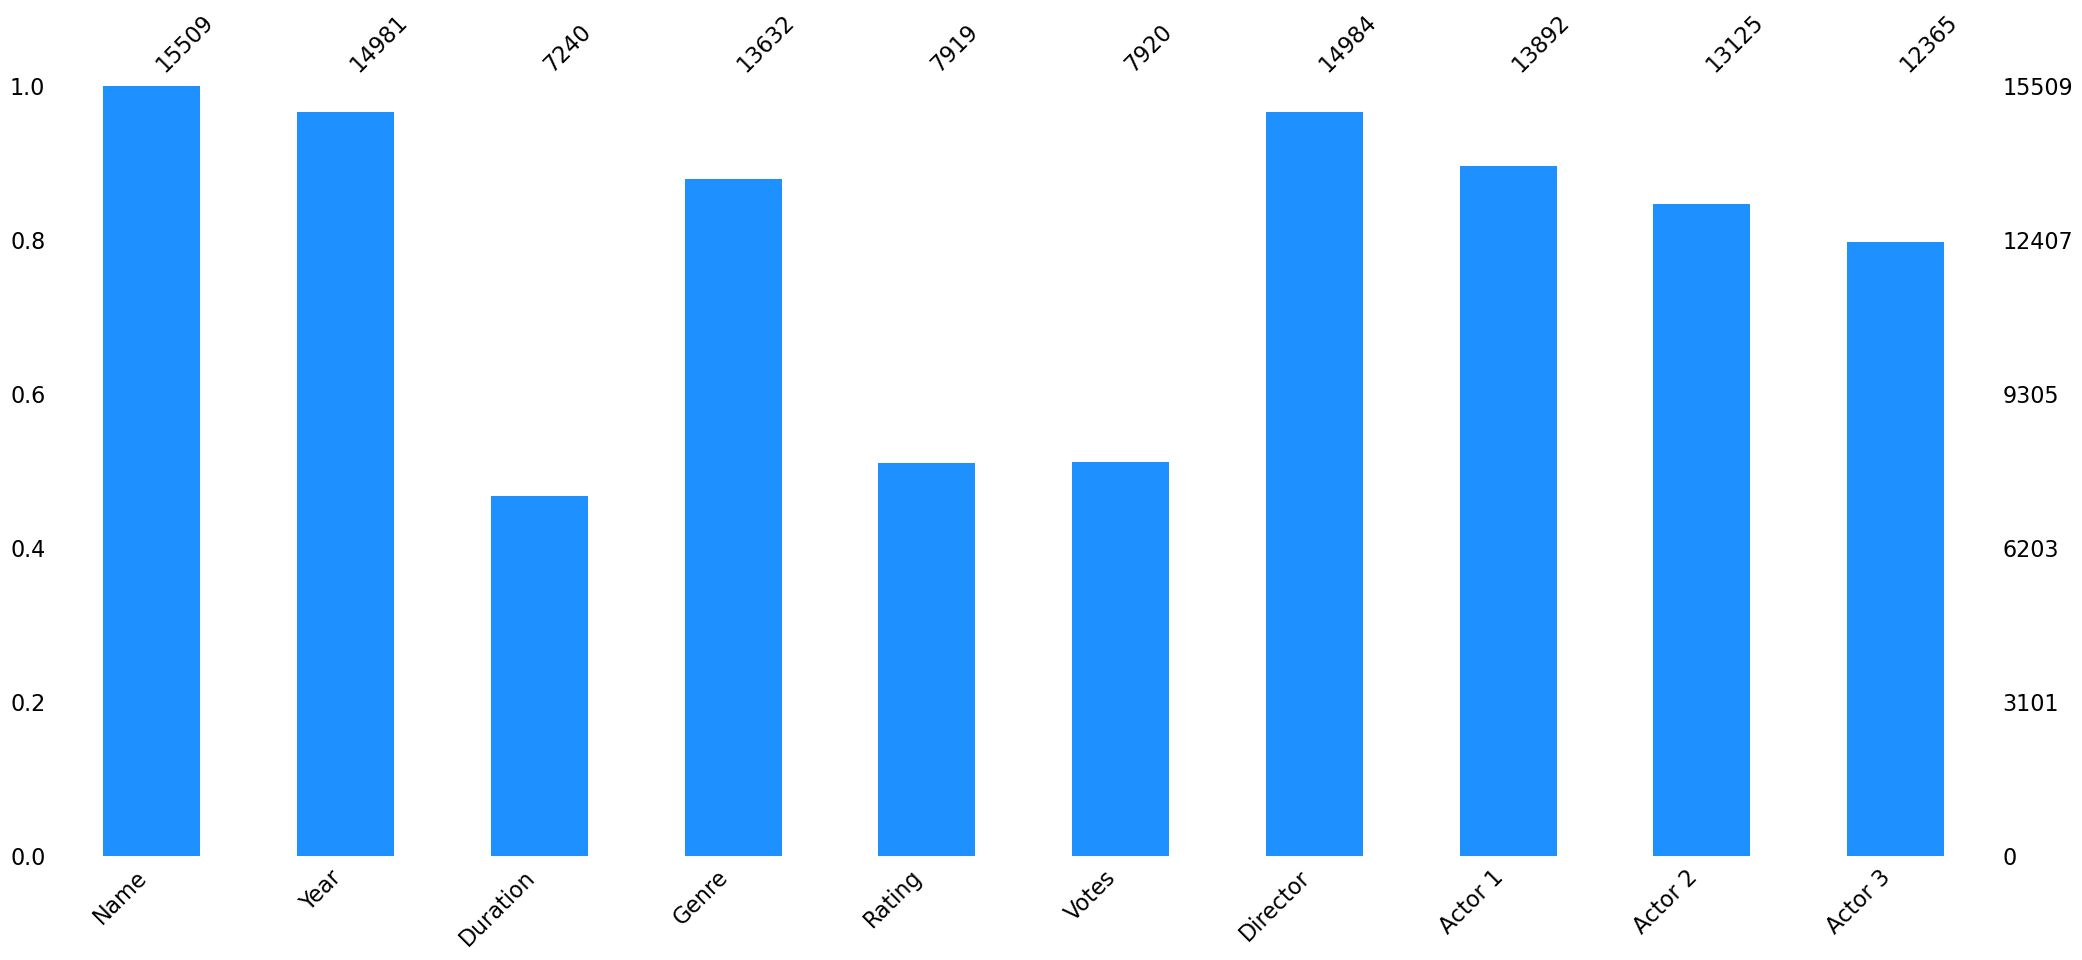

In [15]:
import missingno as msn
msn.bar(df,color="dodgerblue")

In [16]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [48]:
convdtypes(df,Colm=["Name","Genre","Director","Actor 1","Actor 2","Actor 3"])

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  Parameters:DataFrame,Colm is the columns which are to be in category
  this function will conver

In [17]:
max_ratings_per_year = df.groupby("Year")["Rating"].max().reset_index()
# Create a bar plot
fig = px.bar(max_ratings_per_year, x="Year", y="Rating", title="Best Ratings by Year")
fig.update_layout(xaxis_title="Year", yaxis_title="Best Rating")
fig.show()

In [18]:
df["Votes"]=df["Votes"].replace("$5.16M",5160000.0)

In [19]:
df[df["Votes"]==5160000.0]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
9500,Moonlight: Unfortunately a Love Story,2006,NaN,Comedy,NaN,5160000.0,Raman Bharadwaj,Kim Sharma,Shekhar Suman,Perizaad Zorabian


In [20]:
num_cols=["Year","Duration","Votes"]
for i in num_cols:
    df[i]=df[i].astype(np.number)

In [21]:
df["Rating"]=df["Rating"].fillna(df["Rating"].median())

In [22]:
df.dtypes

Name        category
Year         float64
Duration     float64
Genre       category
Rating       float64
Votes        float64
Director    category
Actor 1     category
Actor 2     category
Actor 3     category
dtype: object

In [23]:
year_ratingdf=(df["Year"],df["Rating"])

In [24]:
year_ratingdf=pd.DataFrame(year_ratingdf)
year_ratingdf=year_ratingdf.T

In [25]:
year_ratingdf

,Year,Rating
0,NaN,6.0
1,2019.0,7.0
2,2021.0,6.0
3,2019.0,4.4
4,2010.0,6.0
...,...,...
15504,1988.0,4.6
15505,1999.0,4.5
15506,2005.0,6.0
15507,1988.0,6.0


In [26]:
def count_plot(DataFrame,col1,col2):                              #count plot--> is used to Show the counts of observations in each categorical bin using bars
  Count_plot = sns.countplot(x=col1,hue=col2,data=DataFrame)      # hue-->This parameter take column name for colour encoding, 'data' --> This parameter take DataFrame, array, or list of arrays
  Count_plot

In [27]:
import plotly.express as px

def Count_plot(DataFrame, col1, col2):
    fig = px.histogram(DataFrame, x=col1, color=col2, barmode='group')
    fig.show()


In [28]:
Count_plot(year_ratingdf,"Rating","Year")

In [29]:
average_rating_per_year = df.groupby('Year')['Rating'].mean()
best_rating_year = average_rating_per_year.idxmax()
print("Year with the best average rating:", best_rating_year)

# Create a line plot to visualize the average ratings per year
fig = px.line(average_rating_per_year, x=average_rating_per_year.index, y=average_rating_per_year.values,
              labels={'x': 'Year', 'y': 'Average Rating'},
              title='Average Rating of Movies per Year')
fig.add_annotation(x=best_rating_year, y=average_rating_per_year[best_rating_year],
                   text='Best Rating Year', showarrow=True, arrowhead=1)
fig.show()

Year with the best average rating: 1917.0


In [30]:
# Calculate the correlation between Duration and Rating
correlation = df['Duration'].corr(df['Rating'])
print("Correlation between Duration and Rating:", correlation)

# Create a scatter plot to visualize the relationship between Duration and Rating
fig = px.scatter(df, x='Duration', y='Rating', labels={'Duration': 'Duration (minutes)', 'Rating': 'Rating'},
                 title='Correlation between Duration and Rating')
fig.show()

Correlation between Duration and Rating: -0.032018113514804825


In [31]:
# top_movies_per_year = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Rating')).reset_index(drop=True)

# # Select the overall top 10 movies based on their ratings
# top_movies_overall = df.nlargest(10, 'Rating')

# # Create a bar plot for the top 10 movies per year using Plotly Express
# fig_per_year = px.bar(top_movies_per_year, x='Year', y='Rating', color='Name',
#                       labels={'Year': 'Year', 'Rating': 'Rating', 'Name': 'Movie Name'},
#                       title='Top 10 Movies Per Year based on Ratings')
# fig_per_year.show()

# # Create a bar plot for the overall top 10 movies using Plotly Express
# fig_overall = px.bar(top_movies_overall, x='Name', y='Rating', color='Year',
#                      labels={'Name': 'Movie Name', 'Rating': 'Rating', 'Year': 'Year'},
#                      title='Overall Top 10 Movies based on Ratings')
# fig_overall.show()


In [32]:
# Clean the 'Name' column by removing whitespace and empty values
#df['Name'] = df['Name'].str.strip()  # Remove leading and trailing whitespace
#df = df[df['Name'] != ""]  # Remove empty values

# Define the threshold for considering a movie as popular (e.g., rating above 8)
#popular_rating_threshold = 8

# Filter movies with a high rating
#popular_movies = df[df['Rating'] > popular_rating_threshold]

# Group and count the number of popular movies released each year
#popular_movies_per_year = popular_movies.groupby('Year')['Name'].count().reset_index()

# Create a bar plot using Plotly Express
#fig = px.bar(popular_movies_per_year, x='Year', y='Name', labels={'Year': 'Year', 'Name': 'Number of Popular Movies'},
#           title='Number of Popular Movies Released Each Year')
#fig.show()


In [33]:
df['Name'] = df['Name'].str.strip()  # Remove leading and trailing whitespace
df = df[df['Name'] != ""]  # Remove empty values

# Define the threshold for considering a movie as popular (e.g., rating above 8)
popular_rating_threshold = 8

# Filter movies with a high rating
popular_movies = df[df['Rating'] > popular_rating_threshold]

# Group and count the number of popular movies released each year
popular_movies_per_year = popular_movies.groupby('Year')['Name'].apply(list).reset_index()
popular_movies_per_year['Number of Popular Movies'] = popular_movies_per_year['Name'].apply(len)

# Create a bar plot using Plotly Express
fig = px.bar(popular_movies_per_year, x='Year', y='Number of Popular Movies', 
             text='Name', labels={'Year': 'Year', 'Number of Popular Movies': 'Number of Popular Movies'},
             title='Number of Popular Movies Released Each Year')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(height=800,width=1500)
fig.show()


In [34]:
# votes_per_year = df.groupby('Year')['Votes'].sum().reset_index()

# # Calculate the total votes for top-rated movies (rating > 8) per year
# votes_for_top_movies = df[df['Rating'] > 8].groupby('Year')['Votes'].sum().reset_index()

# # Create a line plot to visualize the total votes per year and for top-rated movies
# fig = px.line(votes_per_year, x='Year', y='Votes', labels={'Year': 'Year', 'Votes': 'Total Votes'},
#               title='Total Votes per Year and for Top-rated Movies')
# fig.add_scatter(x=votes_for_top_movies['Year'], y=votes_for_top_movies['Votes'], mode='lines',
#                 name='Top-rated Movies (Rating > 8)')
# fig.show()

In [35]:
import plotly.express as px

# Group and sum the votes for all movies per year
votes_per_year = df.groupby('Year')['Votes'].sum().reset_index()

# Calculate the total votes for top-rated movies (rating > 8) per year
votes_for_top_movies = df[df['Rating'] > 8].groupby('Year').agg({'Votes': 'sum', 'Name': ' '.join}).reset_index()

# Create a line plot to visualize the total votes per year and for top-rated movies
fig = px.line(votes_per_year, x='Year', y='Votes', labels={'Year': 'Year', 'Votes': 'Total Votes'},
              title='Total Votes per Year and for Top-rated Movies')

# Add scatter plot for top-rated movies with movie names as labels
fig.add_scatter(x=votes_for_top_movies['Year'], y=votes_for_top_movies['Votes'], mode='lines+markers',
                name='Top-rated Movies (Rating > 8)', text=votes_for_top_movies['Name'])

# Set the hover text format for the movie names
fig.update_traces(texttemplate='%{text}', textposition='top center')

# Show the plot
fig.show()


In [28]:
import plotly.express as px

top_directors = df['Director'].value_counts().nlargest(10)

# Create a bar plot for the top 10 directors with the most movies
fig_director = px.bar(x=top_directors.index, y=top_directors.values,
                      labels={'x': 'Director', 'y': 'Number of Movies'},
                      title="Top 10 Directors with the Most Movies")
fig_director.update_layout(width=800)
fig_director.show()


In [29]:
import plotly.express as px
# Top 10 actors in Actor 1 column
top_actors1 = df['Actor 1'].value_counts().nlargest(10)
fig_actors1 = px.bar(x=top_actors1.index, y=top_actors1.values,
                     labels={'x': 'Actor', 'y': 'Number of Movies'},
                     title="Top 10 Actors (Actor 1) with the Most Movies")
fig_actors1.update_layout(width=800)
fig_actors1.show()

# Top 10 actors in Actor 2 column
top_actors2 = df['Actor 2'].value_counts().nlargest(10)
fig_actors2 = px.bar(x=top_actors2.index, y=top_actors2.values,
                     labels={'x': 'Actor', 'y': 'Number of Movies'},
                     title="Top 10 Actors (Actor 2) with the Most Movies")
fig_actors2.update_layout(width=800)
fig_actors2.show()

# Top 10 actors in Actor 3 column
top_actors3 = df['Actor 3'].value_counts().nlargest(10)
fig_actors3 = px.bar(x=top_actors3.index, y=top_actors3.values,
                     labels={'x': 'Actor', 'y': 'Number of Movies'},
                     title="Top 10 Actors (Actor 3) with the Most Movies")
fig_actors3.update_layout(width=800)
fig_actors3.show()


In [30]:
top_movies = df['Name'].value_counts().nlargest(10)

# Create a bar plot for the top 10 directors with the most movies
fig_movie = px.bar(x=top_movies.index, y=top_movies.values,
                      labels={'x': 'Movie', 'y': 'Count'},
                      title="Top 10 Movies")
fig_movie.update_layout(width=800)
fig_movie.show()


In [31]:
top_Genre = df['Genre'].value_counts().nlargest(10)

# Create a bar plot for the top 10 directors with the most movies
fig_Genre = px.bar(x=top_Genre.index, y=top_Genre.values,
                      labels={'x': 'Genre', 'y': 'Count'},
                      title="Top 10 Genre")
fig_Genre.update_layout(width=800)
fig_Genre.show()


In [32]:
top_directors

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
Nanabhai Bhatt      46
Dhirubhai Desai     46
Mohammed Hussain    44
David Dhawan        44
B.R. Ishara         44
Name: Director, dtype: int64

In [33]:
dire=[]
for director in top_directors.index:
    dire.append(director)
print("Directors:",dire)

Directors: ['Jayant Desai', 'Kanti Shah', 'Babubhai Mistry', 'Mahesh Bhatt', 'Master Bhagwan', 'Nanabhai Bhatt', 'Dhirubhai Desai', 'Mohammed Hussain', 'David Dhawan', 'B.R. Ishara']


In [34]:
top_actors1

Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
Rajesh Khanna         122
Dev Anand              93
Shashi Kapoor          91
Akshay Kumar           88
Sanjeev Kumar          83
Name: Actor 1, dtype: int64

In [35]:
act1=[]
for actor in top_actors1.index:
    act1.append(actor)
print("Actors1:",act1)

Actors1: ['Ashok Kumar', 'Dharmendra', 'Jeetendra', 'Mithun Chakraborty', 'Amitabh Bachchan', 'Rajesh Khanna', 'Dev Anand', 'Shashi Kapoor', 'Akshay Kumar', 'Sanjeev Kumar']


In [36]:
top_actors2

Rekha                 83
Hema Malini           72
Mithun Chakraborty    63
Dharmendra            61
Mala Sinha            48
Helen                 48
Reena Roy             45
Mumtaz                45
Jaya Prada            44
Shabana Azmi          44
Name: Actor 2, dtype: int64

In [37]:
act2=[]
for actor in top_actors2.index:
    act2.append(actor)
print("Actors2:",act2)

Actors2: ['Rekha', 'Hema Malini', 'Mithun Chakraborty', 'Dharmendra', 'Mala Sinha', 'Helen', 'Reena Roy', 'Mumtaz', 'Jaya Prada', 'Shabana Azmi']


In [38]:
top_actors3

Pran                  91
Shakti Kapoor         65
Anupam Kher           64
Jeevan                59
Prem Chopra           52
Aruna Irani           47
Shatrughan Sinha      45
Mithun Chakraborty    45
Raj Babbar            43
Nirupa Roy            43
Name: Actor 3, dtype: int64

In [39]:
act3=[]
for actor in top_actors3.index:
    act3.append(actor)
print("Actors3:",act3)

Actors3: ['Pran', 'Shakti Kapoor', 'Anupam Kher', 'Jeevan', 'Prem Chopra', 'Aruna Irani', 'Shatrughan Sinha', 'Mithun Chakraborty', 'Raj Babbar', 'Nirupa Roy']


In [40]:
top_movies

Mamta       7
Anjaam      7
Musafir     6
Zindagi     6
Toofan      5
Dost        5
Armaan      5
Shikari     5
Muqabla     5
Shararat    5
Name: Name, dtype: int64

In [41]:
mve=[]
for movie in top_movies.index:
    mve.append(movie)
print("Movies:",mve)

Movies: ['Mamta', 'Anjaam', 'Musafir', 'Zindagi', 'Toofan', 'Dost', 'Armaan', 'Shikari', 'Muqabla', 'Shararat']


In [42]:
top_Genre

Drama                   2780
Action                  1289
Thriller                 779
Romance                  708
Drama, Romance           524
Comedy                   495
Action, Crime, Drama     455
Drama, Family            418
Horror                   322
Action, Drama            316
Name: Genre, dtype: int64

In [43]:
genr=[]
for genre in top_Genre.index:
    genr.append(genre)
print("Genre:",genr)

Genre: ['Drama', 'Action', 'Thriller', 'Romance', 'Drama, Romance', 'Comedy', 'Action, Crime, Drama', 'Drama, Family', 'Horror', 'Action, Drama']


In [45]:
# df.loc[df['Name'].isin(mve), 'Name'] = df['Name']
# df.loc[~df['Name'].isin(mve), 'Name'] = 'Others'

# df.loc[df['Genre'].isin(genr), 'Genre'] = df['Genre']
# df.loc[~df['Genre'].isin(genr), 'Genre'] = 'Others'

# df.loc[df['Director'].isin(dire), 'Director'] = df['Director']
# df.loc[~df['Director'].isin(dire), 'Director'] = 'Others'

# df.loc[df['Actor 1'].isin(act1), 'Actor 1'] = df['Actor 1']
# df.loc[~df['Actor 1'].isin(act1), 'Actor 1'] = 'Others'

# df.loc[df['Actor 2'].isin(act2), 'Actor 2'] = df['Actor 2']
# df.loc[~df['Actor 2'].isin(act2), 'Actor 2'] = 'Others'

# df.loc[df['Actor 3'].isin(act3), 'Actor 3'] = df['Actor 3']
# df.loc[~df['Actor 3'].isin(act3), 'Actor 3'] = 'Others'
df['Name'] = df['Name'].apply(lambda x: x if x in mve else 'Others')
df['Genre'] = df['Genre'].apply(lambda x: x if x in genr else 'Others')
df['Director'] = df['Director'].apply(lambda x: x if x in dire else 'Others')
df['Actor 1'] = df['Actor 1'].apply(lambda x: x if x in act1 else 'Others')
df['Actor 2'] = df['Actor 2'].apply(lambda x: x if x in act2 else 'Others')
df['Actor 3'] = df['Actor 3'].apply(lambda x: x if x in act3 else 'Others')

In [46]:
Unique_Vals(df,Colm=["Name","Genre","Director","Actor 1","Actor 2","Actor 3"])

Number of unique values in Name is  11 

Others      15453
Anjaam          7
Mamta           7
Musafir         6
Zindagi         6
Armaan          5
Dost            5
Muqabla         5
Shararat        5
Shikari         5
Toofan          5
Name: Name, dtype: int64
****************************************************************************************************
****************************************************************************************************
Number of unique values in Genre is  11 

Others                  5546
Drama                   2780
Action                  1289
Thriller                 779
Romance                  708
Drama, Romance           524
Comedy                   495
Action, Crime, Drama     455
Drama, Family            418
Horror                   322
Action, Drama            316
Name: Genre, dtype: int64
****************************************************************************************************
**********************************************

In [49]:
df.dtypes

Name        category
Year         float64
Duration     float64
Genre       category
Rating       float64
Votes        float64
Director    category
Actor 1     category
Actor 2     category
Actor 3     category
dtype: object

In [50]:
X,y = X_Y_df(df,"Rating")

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  This function will divide the dataset into X and y
  
  
***************************************

In [51]:
X_train,X_test,y_train,y_test=Train_Test_df(X,y)

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  This fucntion will  split the train and test test size 30%
  
**********************************

In [52]:
X_train_num,X_train_cat=num_cat_df(X_train)

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

    This function will divide the data into num columns and cat columns
    
*********************

In [53]:
X_test_num,X_test_cat=num_cat_df(X_test)

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

    This function will divide the data into num columns and cat columns
    
*********************

# **<font color="C3002F">Dummification</font>**

In [54]:
X_train_cat,enc=get_dummies(X_train_cat,X_train_cat.columns)

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  In this fuction we are doing one hot encoder to the categorical columns
  
  
******************

In [55]:
X_test_dum = pd.DataFrame(enc.transform(X_test_cat).toarray())
X_test_dum.columns = enc.get_feature_names_out(input_features=X_test_cat.columns)

# **<font color="C30600">MICE Imputation</font>**

In [56]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
imputer_cat = IterativeImputer(estimator=rf,missing_values=np.nan,initial_strategy="most_frequent", max_iter=50, verbose=2, imputation_order='descending',random_state=123)
imputer_cat=imputer_cat.fit(X_train_cat)
X_train_cat_impute=pd.DataFrame(imputer_cat.transform(X_train_cat),columns=X_train_cat.columns)

[IterativeImputer] Completing matrix with shape (10856, 65)
[IterativeImputer] Ending imputation round 1/50, elapsed time 43.64
[IterativeImputer] Change: 0.0, scaled tolerance: 0.001 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (10856, 65)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.00


In [57]:
X_test_cat_impute=pd.DataFrame(imputer_cat.transform(X_test_dum),columns=X_train_cat.columns)

[IterativeImputer] Completing matrix with shape (4653, 65)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.00


In [58]:
X_train_cat_impute.isnull().sum()

Name_Armaan                 0
Name_Dost                   0
Name_Mamta                  0
Name_Muqabla                0
Name_Musafir                0
                           ..
Actor 3_Prem Chopra         0
Actor 3_Raj Babbar          0
Actor 3_Shakti Kapoor       0
Actor 3_Shatrughan Sinha    0
Actor 3_nan                 0
Length: 65, dtype: int64

In [59]:
X_test_cat_impute.isnull().sum()

Name_Armaan                 0
Name_Dost                   0
Name_Mamta                  0
Name_Muqabla                0
Name_Musafir                0
                           ..
Actor 3_Prem Chopra         0
Actor 3_Raj Babbar          0
Actor 3_Shakti Kapoor       0
Actor 3_Shatrughan Sinha    0
Actor 3_nan                 0
Length: 65, dtype: int64

In [60]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

rf1=RandomForestRegressor()
imputer_num = IterativeImputer(estimator=rf1,missing_values=np.nan,initial_strategy="mean", max_iter=50, verbose=2, imputation_order='descending',random_state=123)
imputer_num=imputer_num.fit(X_train_num)
X_train_num_impute=pd.DataFrame(imputer_num.transform(X_train_num),columns=X_train_num.columns)

[IterativeImputer] Completing matrix with shape (10856, 3)
[IterativeImputer] Ending imputation round 1/50, elapsed time 3.62
[IterativeImputer] Change: 140114.09037089846, scaled tolerance: 591.417 
[IterativeImputer] Ending imputation round 2/50, elapsed time 7.51
[IterativeImputer] Change: 60928.24666666667, scaled tolerance: 591.417 
[IterativeImputer] Ending imputation round 3/50, elapsed time 11.36
[IterativeImputer] Change: 44341.83433333333, scaled tolerance: 591.417 
[IterativeImputer] Ending imputation round 4/50, elapsed time 15.23
[IterativeImputer] Change: 44353.78408333333, scaled tolerance: 591.417 
[IterativeImputer] Ending imputation round 5/50, elapsed time 19.03
[IterativeImputer] Change: 70349.57958333334, scaled tolerance: 591.417 
[IterativeImputer] Ending imputation round 6/50, elapsed time 22.89
[IterativeImputer] Change: 70517.67, scaled tolerance: 591.417 
[IterativeImputer] Ending imputation round 7/50, elapsed time 26.79
[IterativeImputer] Change: 25415.4485

/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



[IterativeImputer] Ending imputation round 2/50, elapsed time 0.41
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.62
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.83
[IterativeImputer] Ending imputation round 5/50, elapsed time 1.04
[IterativeImputer] Ending imputation round 6/50, elapsed time 1.25
[IterativeImputer] Ending imputation round 7/50, elapsed time 1.46
[IterativeImputer] Ending imputation round 8/50, elapsed time 1.66
[IterativeImputer] Ending imputation round 9/50, elapsed time 1.88
[IterativeImputer] Ending imputation round 10/50, elapsed time 2.09
[IterativeImputer] Ending imputation round 11/50, elapsed time 2.29
[IterativeImputer] Ending imputation round 12/50, elapsed time 2.50
[IterativeImputer] Ending imputation round 13/50, elapsed time 2.72
[IterativeImputer] Ending imputation round 14/50, elapsed time 2.93
[IterativeImputer] Ending imputation round 15/50, elapsed time 3.16
[IterativeImputer] Ending imputation round 16/50, elapse

In [61]:
X_test_num_impute=pd.DataFrame(imputer_num.transform(X_test_num),columns=X_test_num.columns)

[IterativeImputer] Completing matrix with shape (4653, 3)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.10
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.21
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.32
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.44
[IterativeImputer] Ending imputation round 5/50, elapsed time 0.55
[IterativeImputer] Ending imputation round 6/50, elapsed time 0.66
[IterativeImputer] Ending imputation round 7/50, elapsed time 0.77
[IterativeImputer] Ending imputation round 8/50, elapsed time 0.88
[IterativeImputer] Ending imputation round 9/50, elapsed time 1.00
[IterativeImputer] Ending imputation round 10/50, elapsed time 1.11
[IterativeImputer] Ending imputation round 11/50, elapsed time 1.22
[IterativeImputer] Ending imputation round 12/50, elapsed time 1.33
[IterativeImputer] Ending imputation round 13/50, elapsed time 1.44
[IterativeImputer] Ending imputation round 14/50, elapsed time 1.55

In [62]:
X_train_num_impute.isnull().sum()

Year        0
Duration    0
Votes       0
dtype: int64

In [63]:
X_test_num_impute.isnull().sum()

Year        0
Duration    0
Votes       0
dtype: int64

# **<font color="00028C">Scaling Numerical Variable</font>**

In [64]:
X_train_num,X_test_num,scaler=Standard_Scaler(X_train_num_impute,X_test_num_impute)

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  This is the Function Written in ml_functions.py File.
  In this Function I'm Standardizing the N

In [65]:
X_train_df=concating_numcat_df(X_train_num,X_train_cat_impute)

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  Combining the standardized numerical columns and categorical columns
  
************************

In [66]:
X_test_df=concating_numcat_df(X_test_num,X_test_cat_impute)

************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

  Combining the standardized numerical columns and categorical columns
  
************************

In [67]:
X_train_df.isnull().sum().sum()

0

In [68]:
X_test_df.isnull().sum().sum()

0

# **<font color="71006D">RandomForest Regressor</font>**

In [69]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=123, max_depth=10, max_features='sqrt', min_samples_leaf=1, n_estimators=800)
rfr = rfr.fit(X_train_df, y_train)

In [70]:
rfr_train_pred=rfr.predict(X_train_df)

In [71]:
rfr_test_pred=rfr.predict(X_test_df)

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def Error_metrics(y_actual,y_pred):
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_actual, y_pred)
    print("Mean Absolute Error:", mae)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_actual, y_pred)
    print("Mean Squared Error:", mse)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(y_actual, y_pred, squared=False)
    print("Root Mean Squared Error:", rmse)

    # Calculate R-squared (Coefficient of Determination)
    r2 = r2_score(y_actual, y_pred)
    print("R-squared:", r2)


In [73]:
Error_metrics(y_train,rfr_train_pred)

Mean Absolute Error: 0.5344516574995051
Mean Squared Error: 0.74390621756529
Root Mean Squared Error: 0.8624999811972693
R-squared: 0.23663216707921286


In [74]:
Error_metrics(y_test,rfr_test_pred)

Mean Absolute Error: 0.5604327224744176
Mean Squared Error: 0.8213324114904369
Root Mean Squared Error: 0.9062739163687968
R-squared: 0.17419195595360215


# **<font color="A40700">GradientBoostingRegressor</font>**

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=123, n_estimators=100, learning_rate=0.1, max_depth=3)
gbr=gbr.fit(X_train_df, y_train)

In [76]:
gbr_train_pred=gbr.predict(X_train_df)
gbr_test_pred=gbr.predict(X_test_df)

In [77]:
print("Error Metrics On Train")
Error_metrics(y_train,gbr_train_pred)
print("**"*100)
print("Error Metrics On Test")
Error_metrics(y_test,gbr_test_pred)

Error Metrics On Train
Mean Absolute Error: 0.5416468490490468
Mean Squared Error: 0.6862602321215137
Root Mean Squared Error: 0.8284082520843896
R-squared: 0.2957862512174283
********************************************************************************************************************************************************************************************************
Error Metrics On Test
Mean Absolute Error: 0.5715595686523544
Mean Squared Error: 0.7655485416874426
Root Mean Squared Error: 0.8749563084448517
R-squared: 0.23027980512024382


In [78]:
gbr_test_pred

array([5.98427977, 5.84407726, 6.2540319 , ..., 5.82336862, 5.79665723,
       6.22558939])